# Determination of lightning length from light curves

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

/storage/experiments/2021/0605_bourka_radosovice


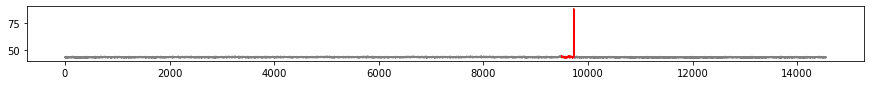

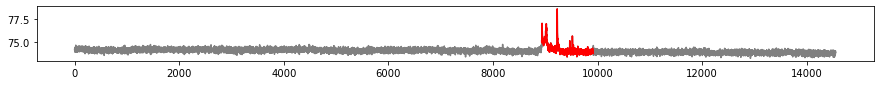

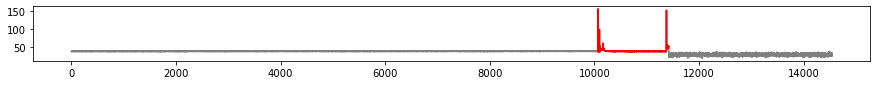

/storage/experiments/2021/0609_bourka_sobeslav


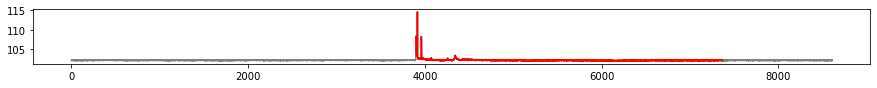

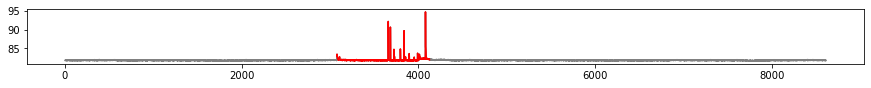

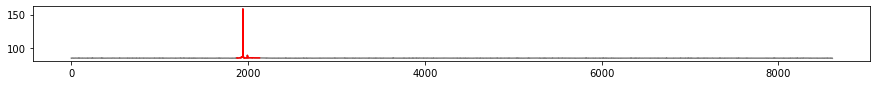

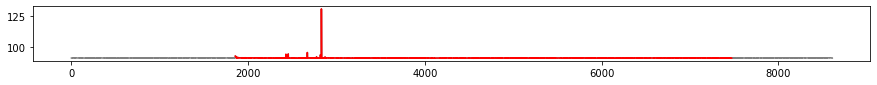

/storage/experiments/2021/0711_bourka_stiavnica


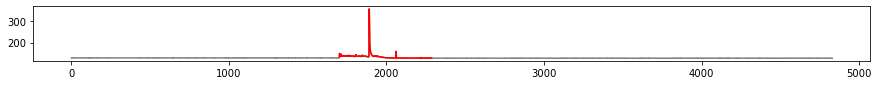

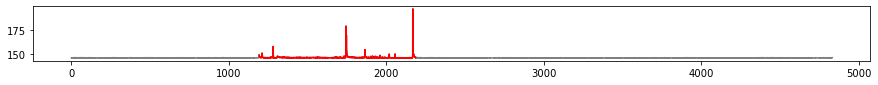

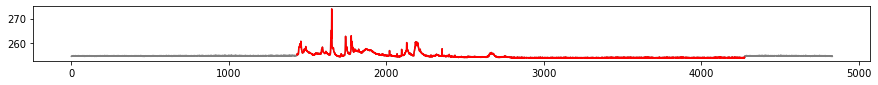

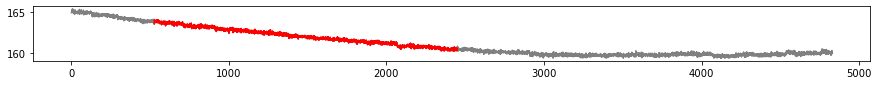

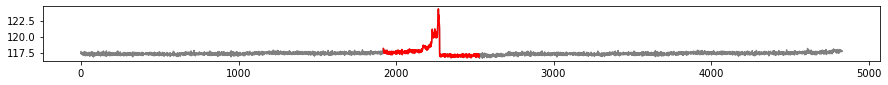

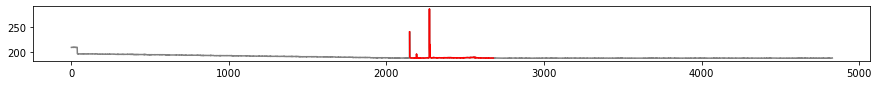

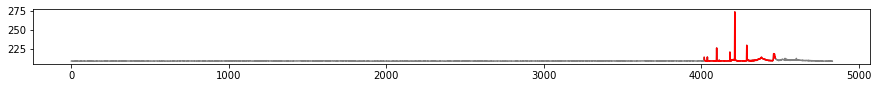

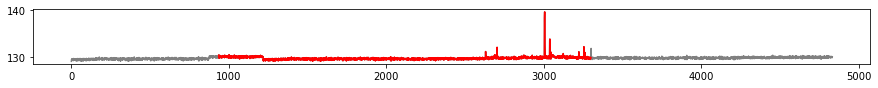

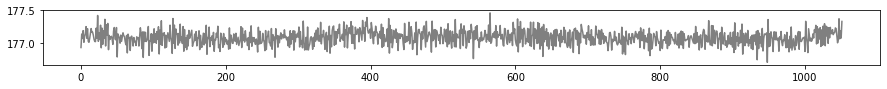

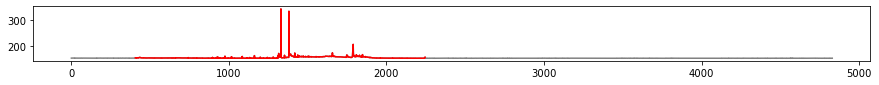

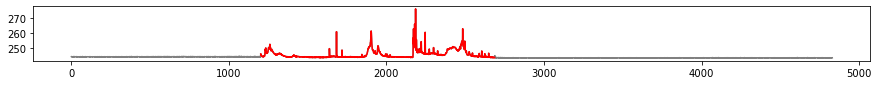

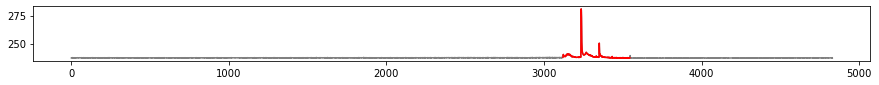

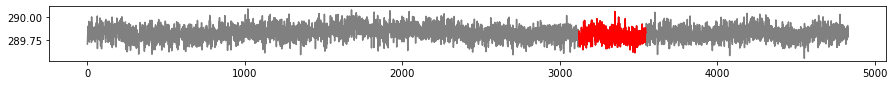

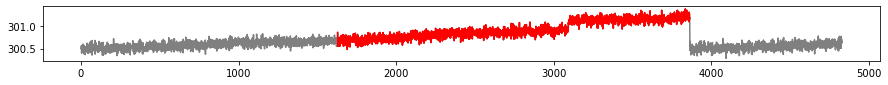

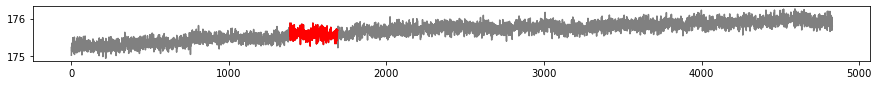

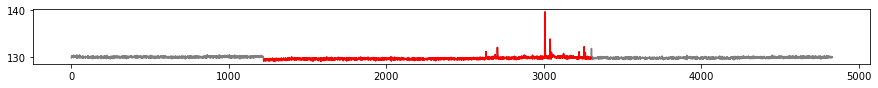

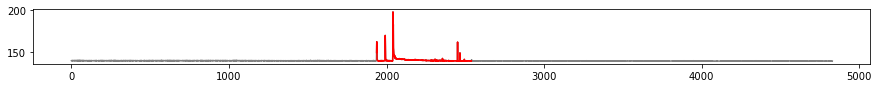

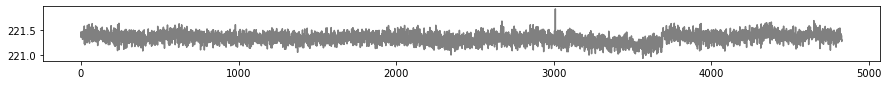

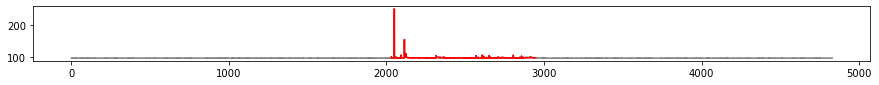

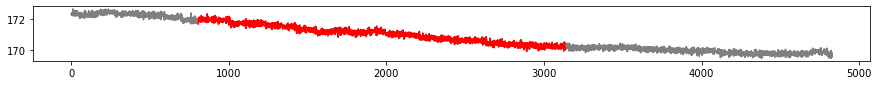

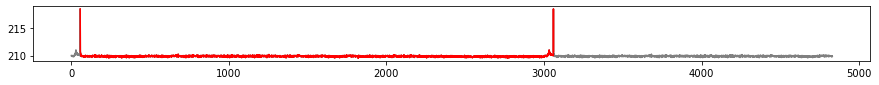

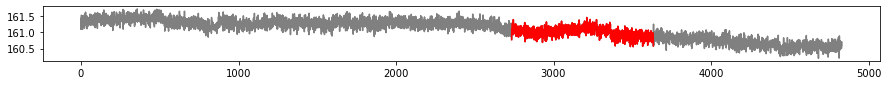

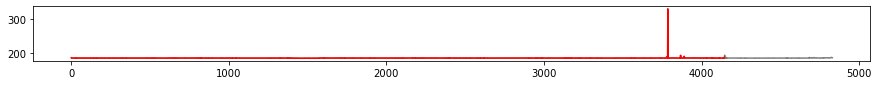

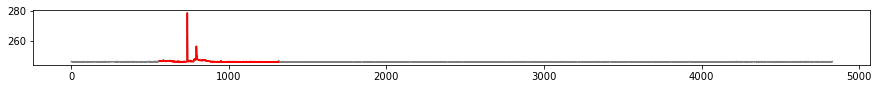

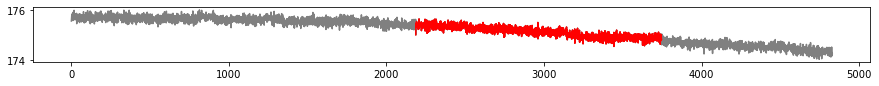

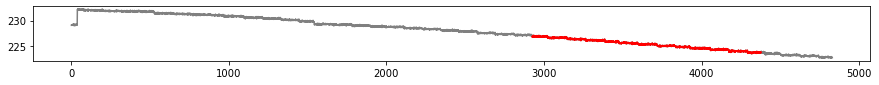

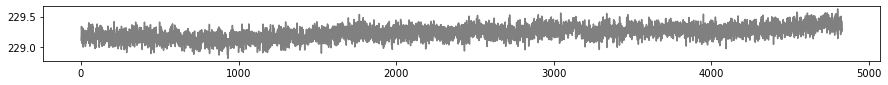

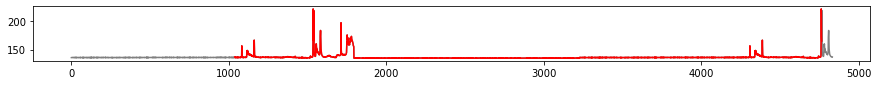

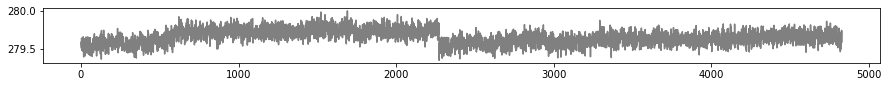

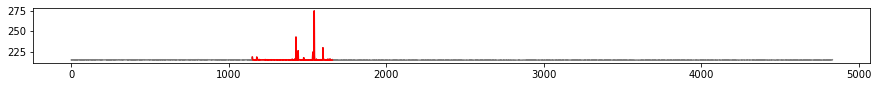

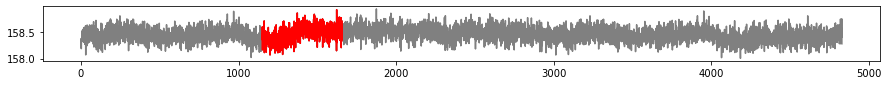

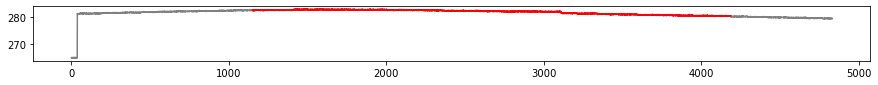

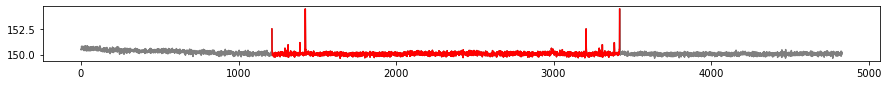

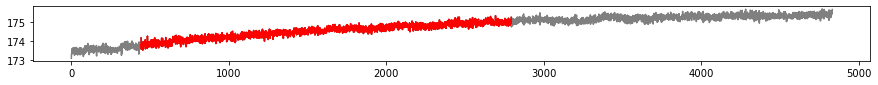

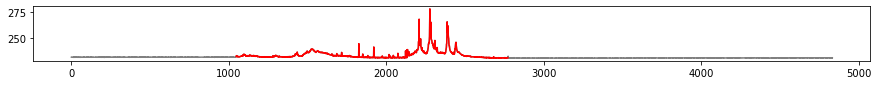

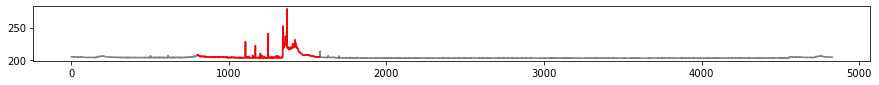

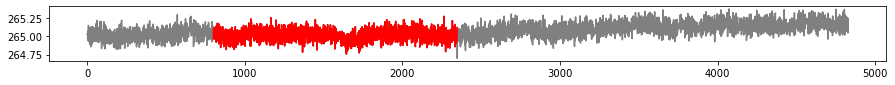

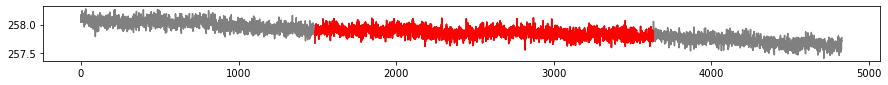

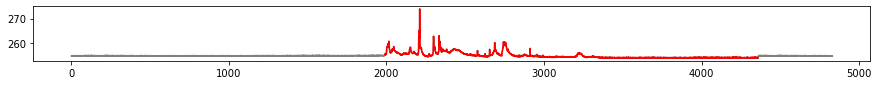

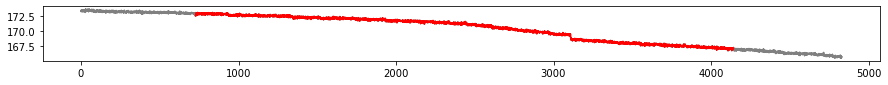

/storage/experiments/2021/0713_bourka_exit29_D8


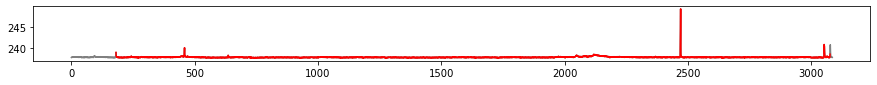

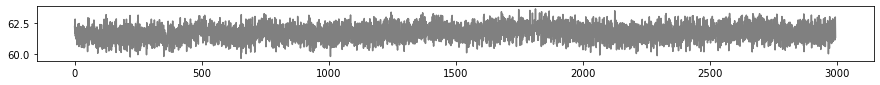

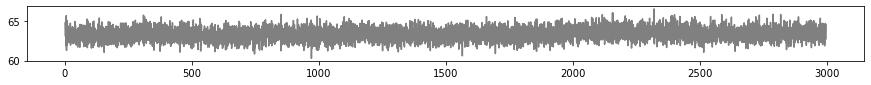

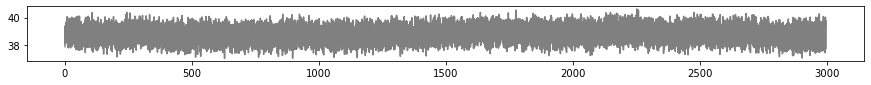

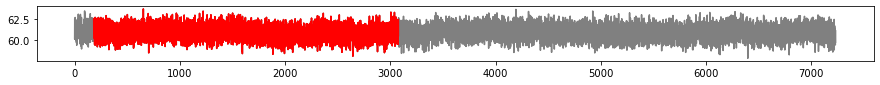

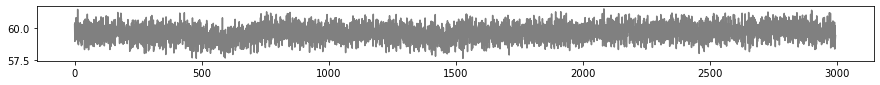

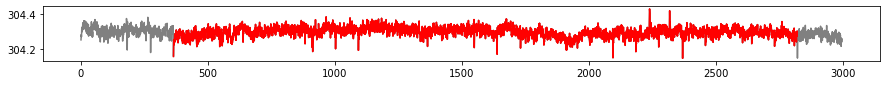

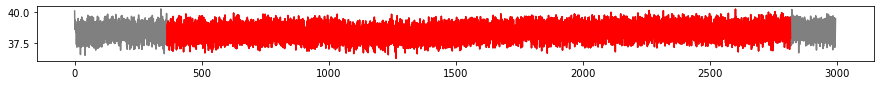

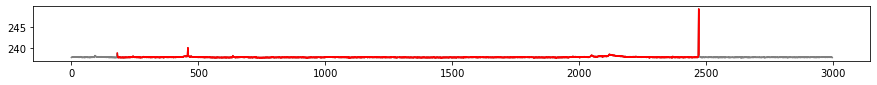

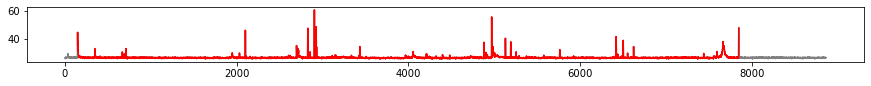

/storage/experiments/2021/0714_bourka_martin


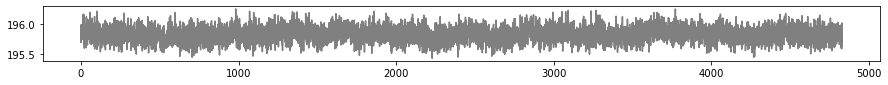

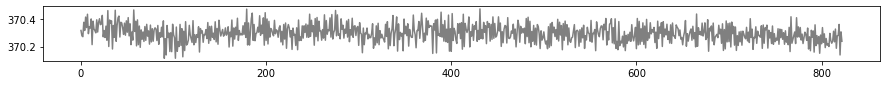

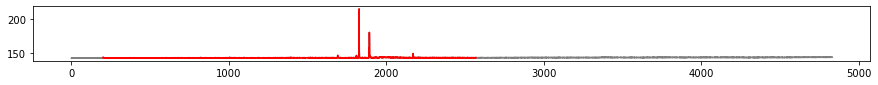

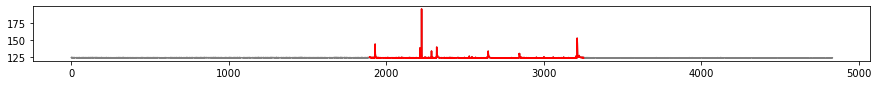

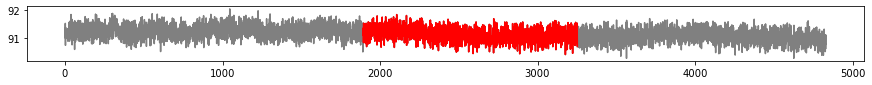

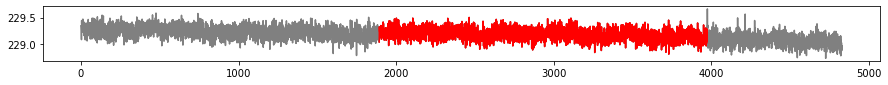

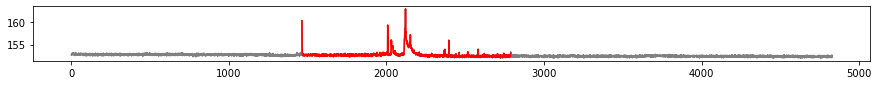

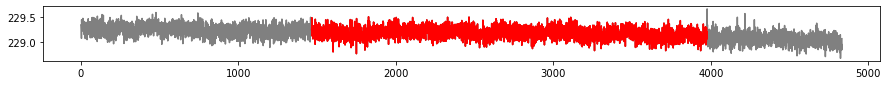

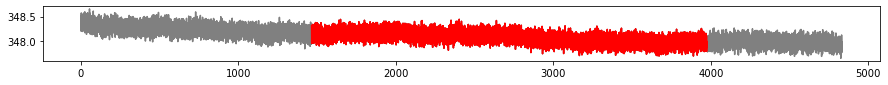

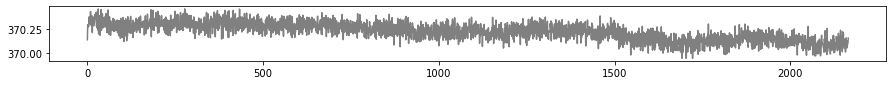

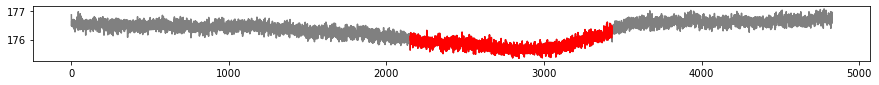

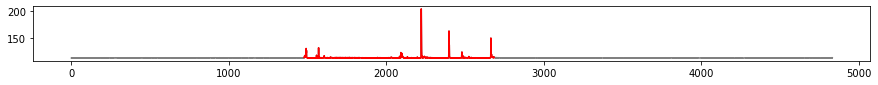

/storage/experiments/2021/0714_bourka_sobeslav


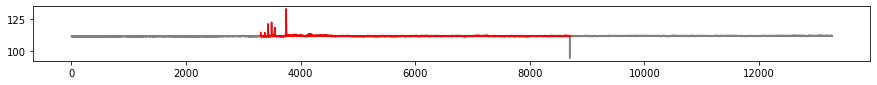

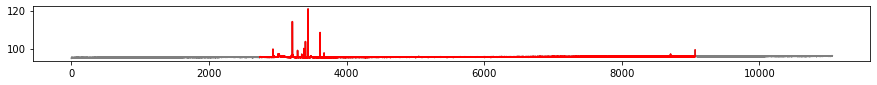

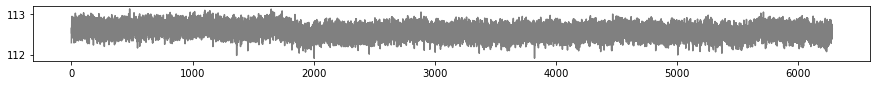

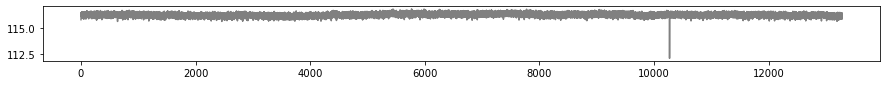

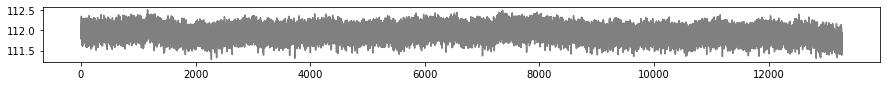

/storage/experiments/2021/0725_bourka_ratmirov


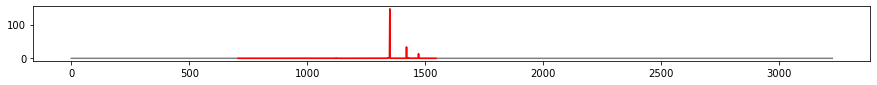

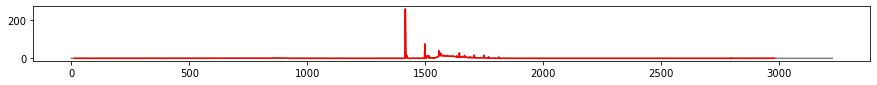

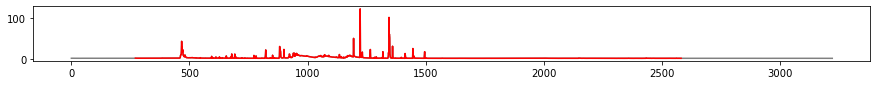

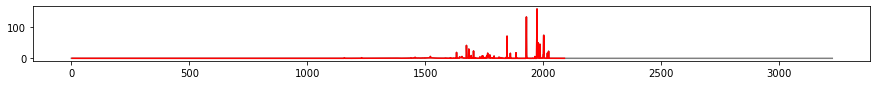

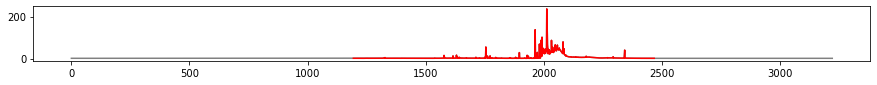

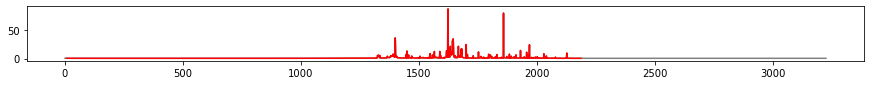

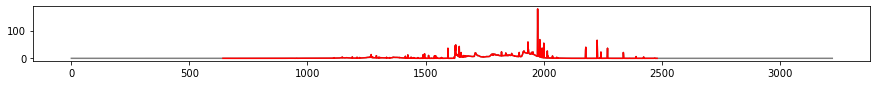

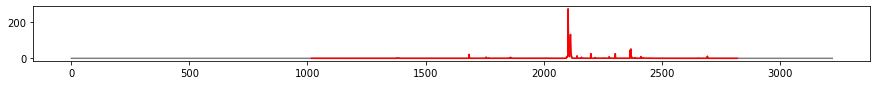

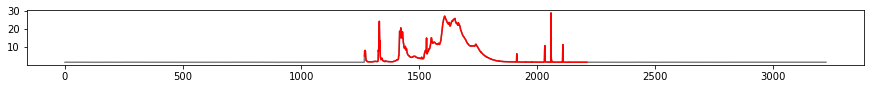

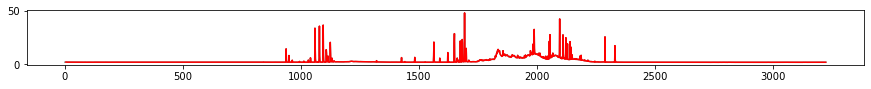

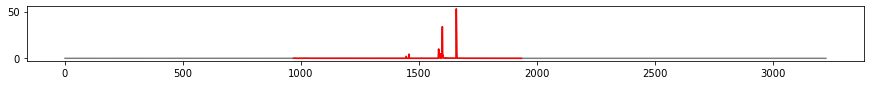

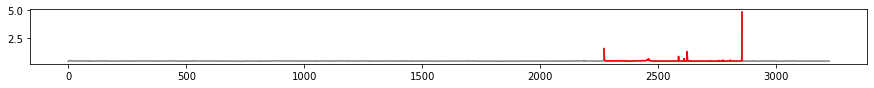

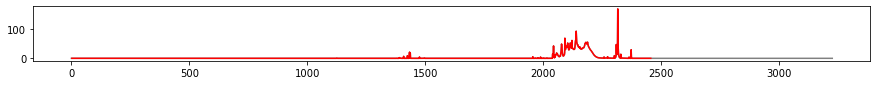

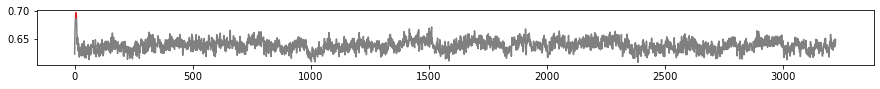

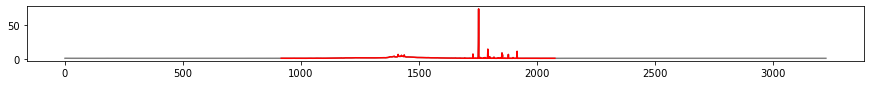

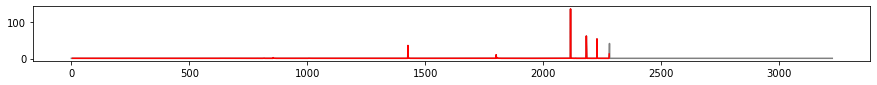

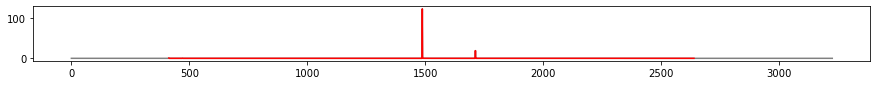

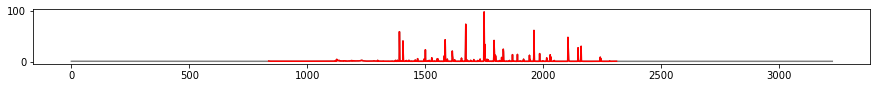

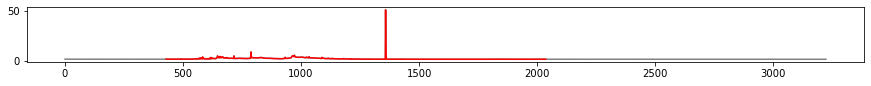

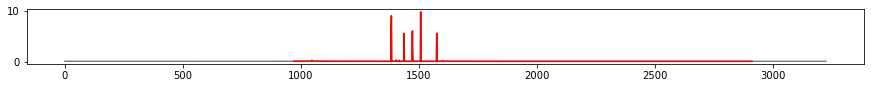

/storage/experiments/2021/0726_bourka_zabori


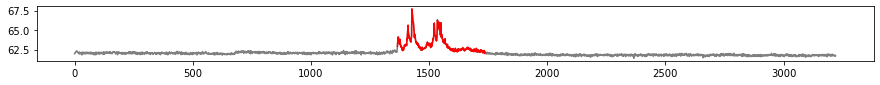

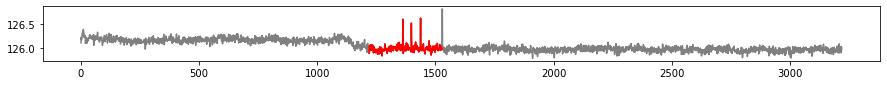

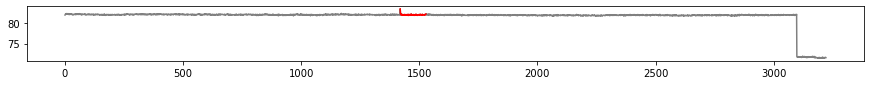

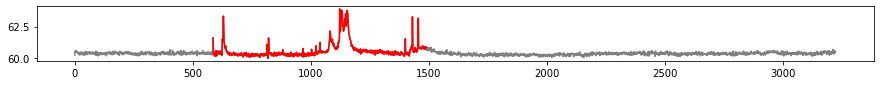

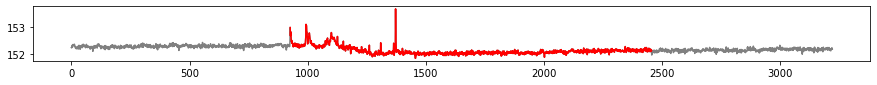

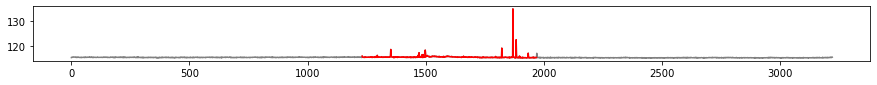

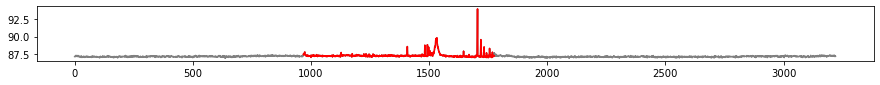

/storage/experiments/2021/0803_bourka_votice


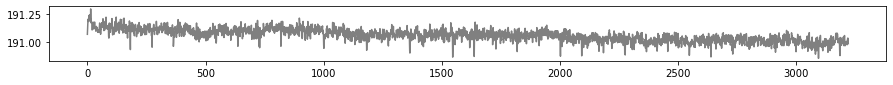

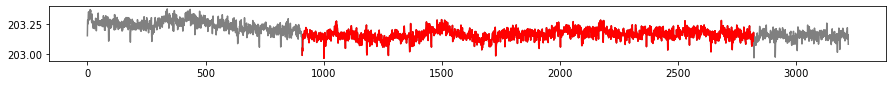

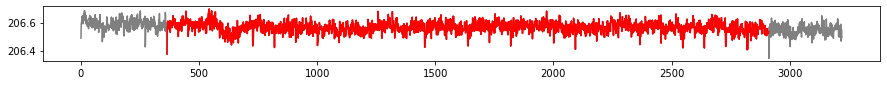

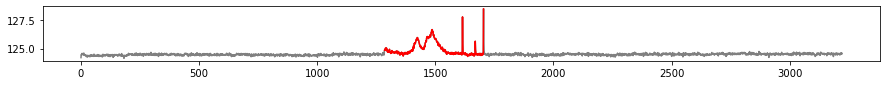

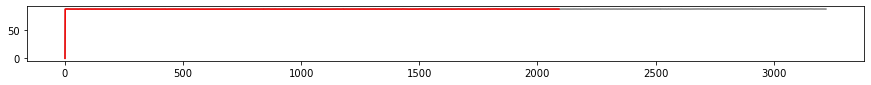

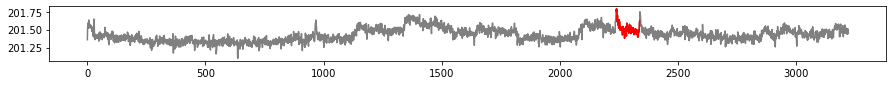

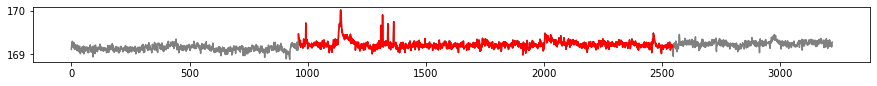

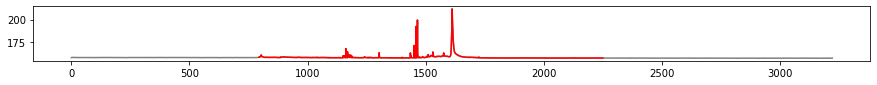

/storage/experiments/2021/0807_bourka_sobeslav


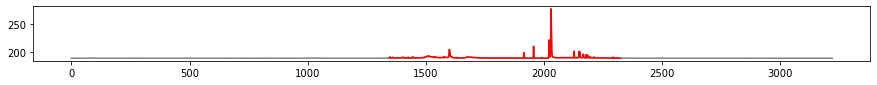

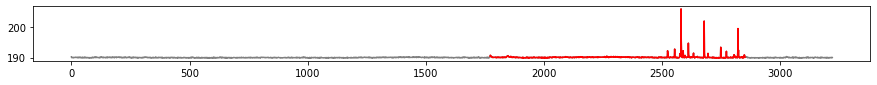

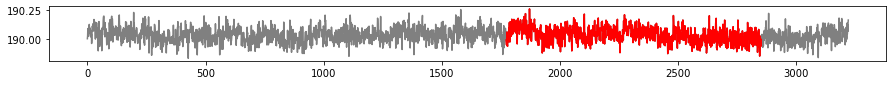

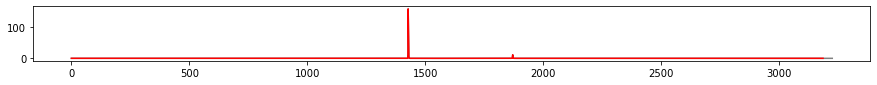

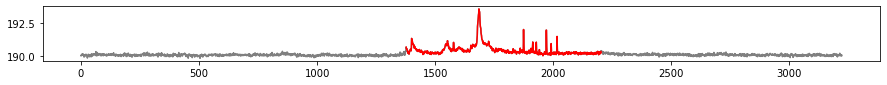

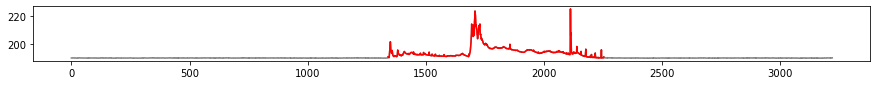

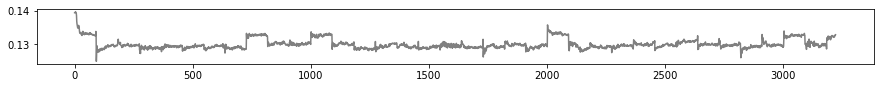

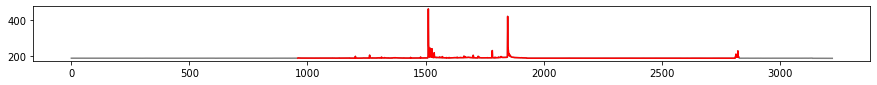

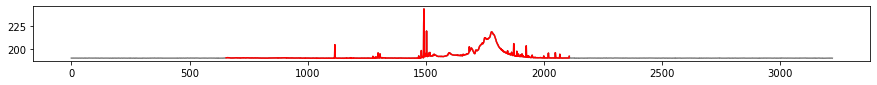

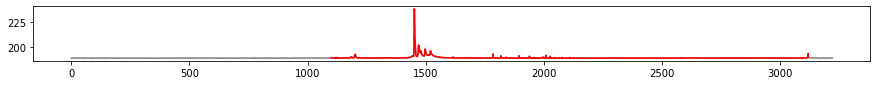

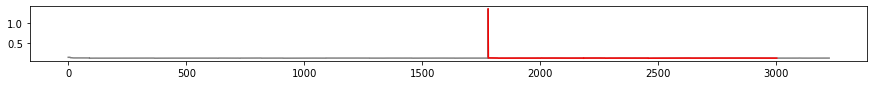

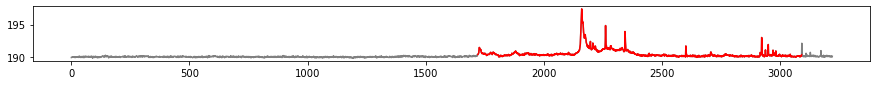

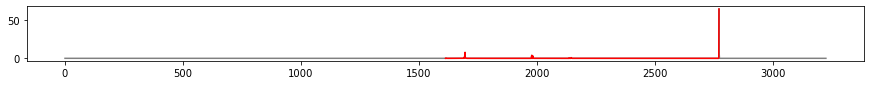

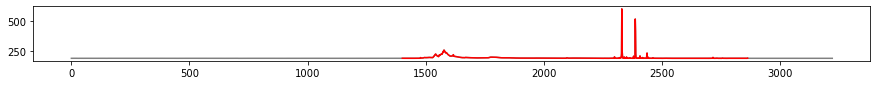

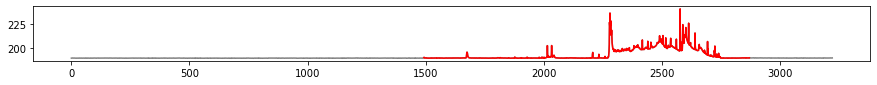

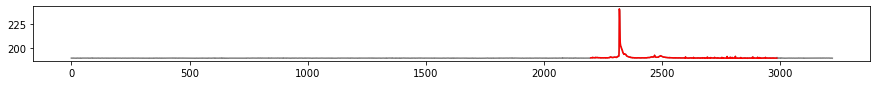

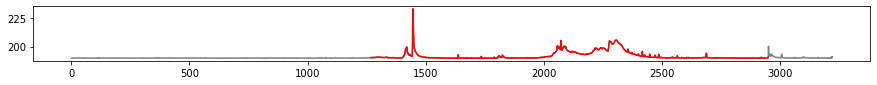

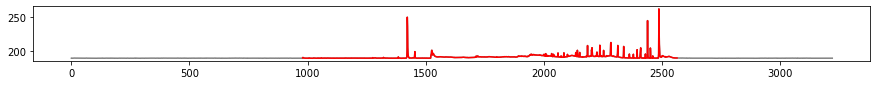

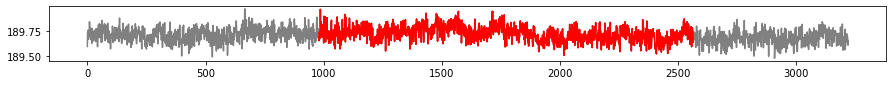

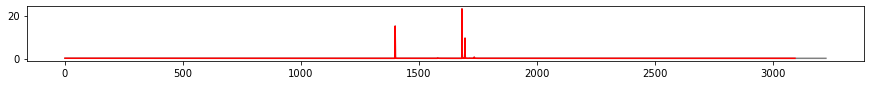

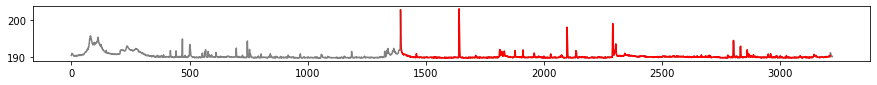

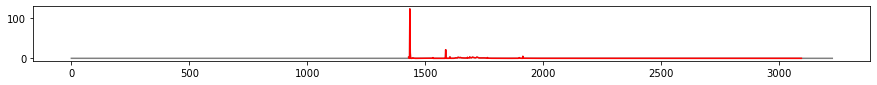

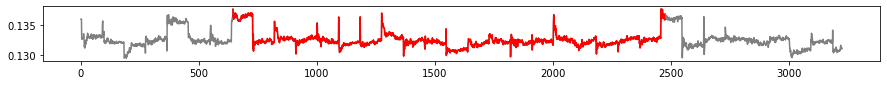

/storage/experiments/2021/0815_bourka_veseli_auto1


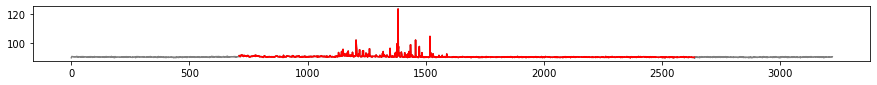

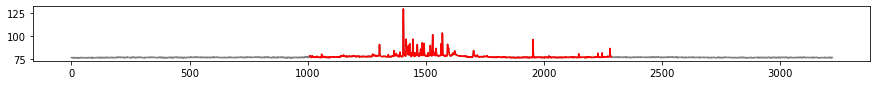

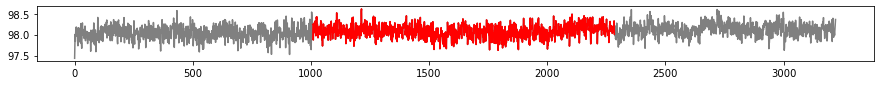

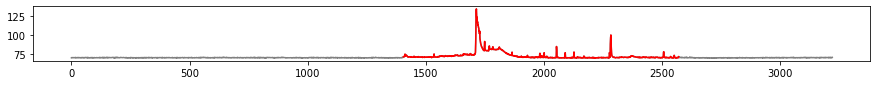

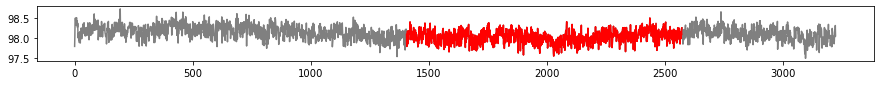

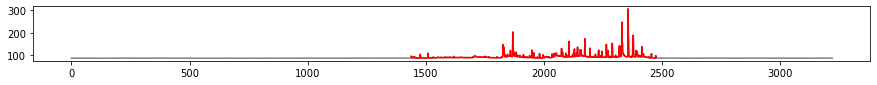

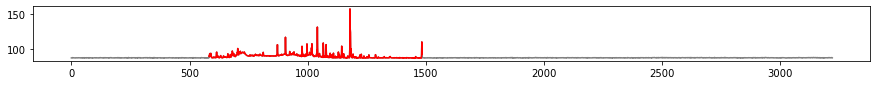

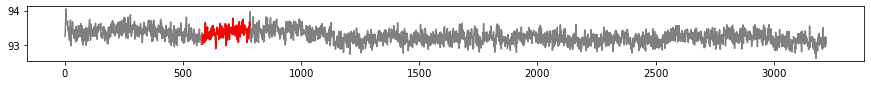

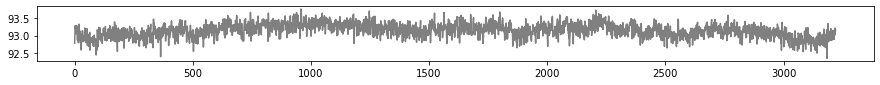

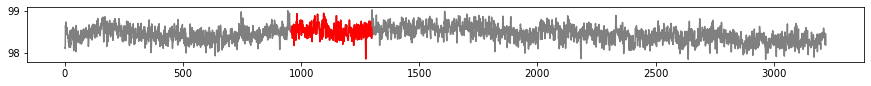

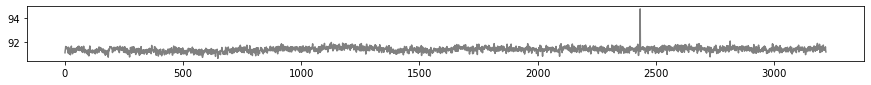

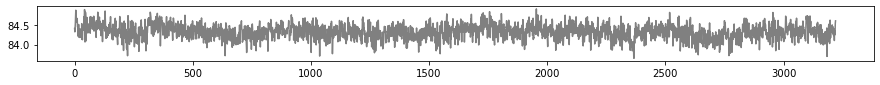

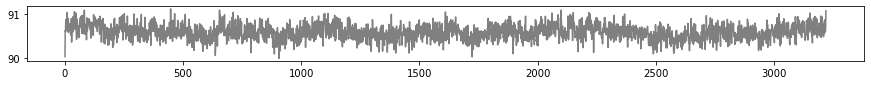

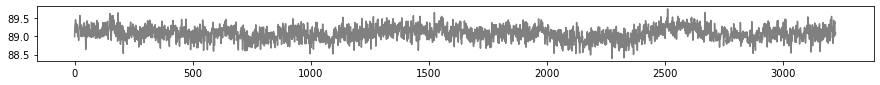

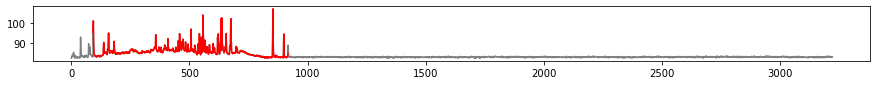

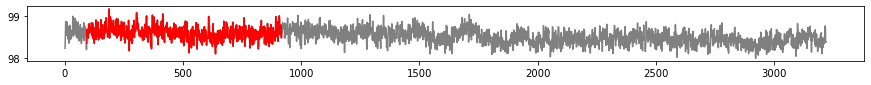

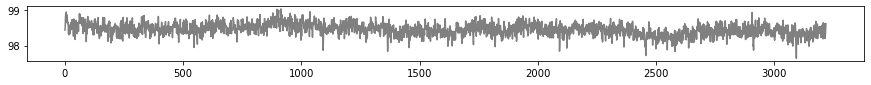

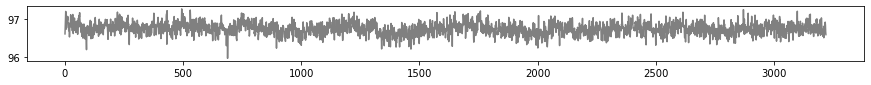

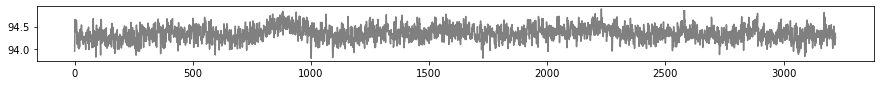

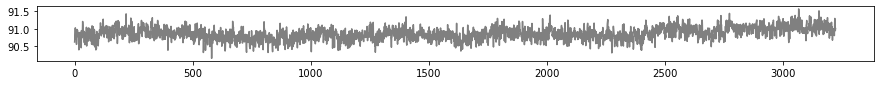

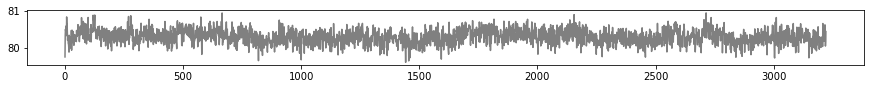

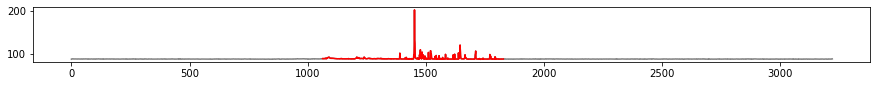

/storage/experiments/2021/0815_bourka_veseli_auto0


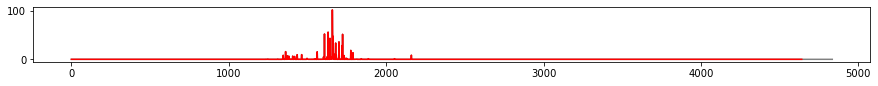

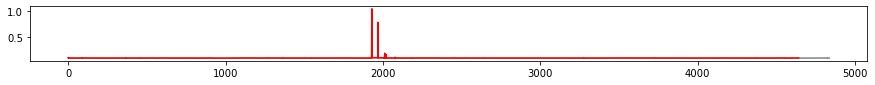

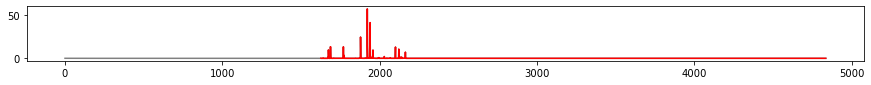

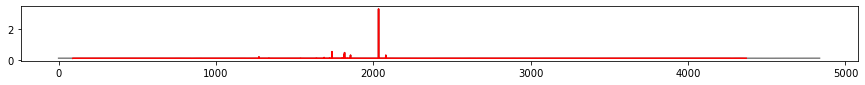

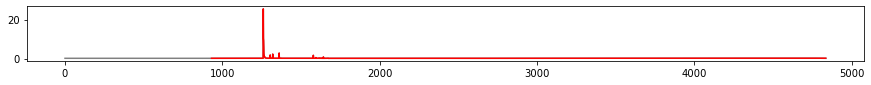

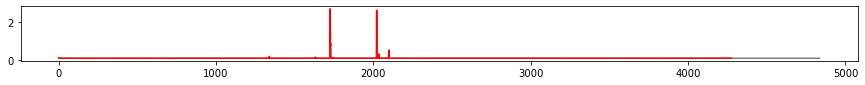

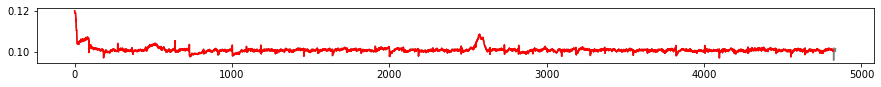

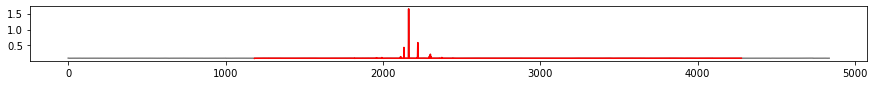

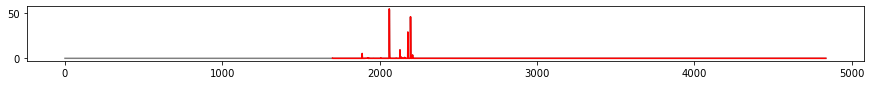

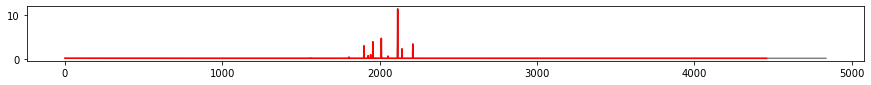

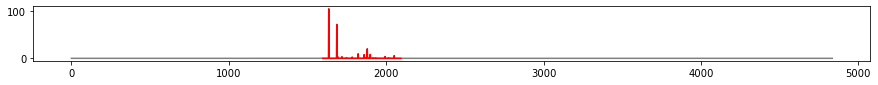

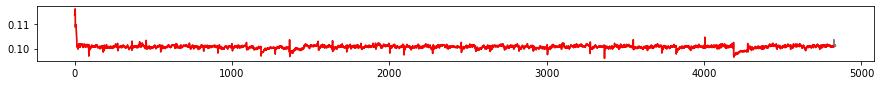

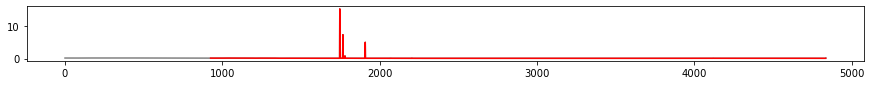

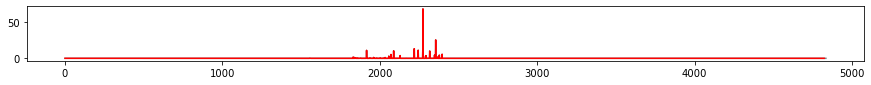

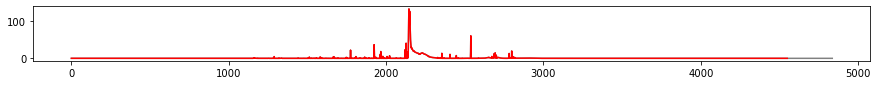

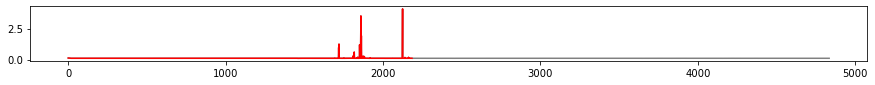

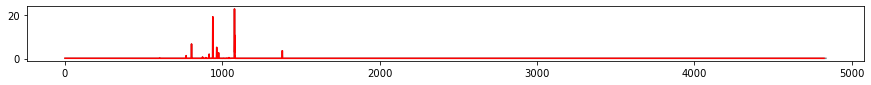

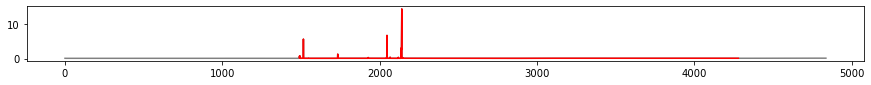

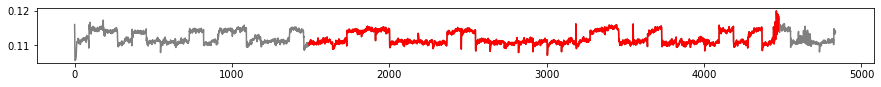

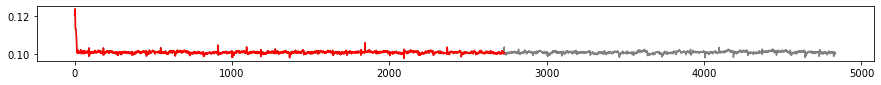

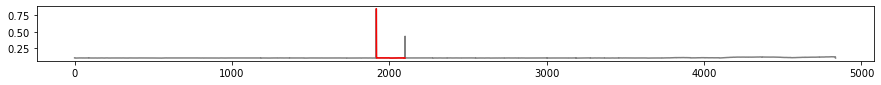

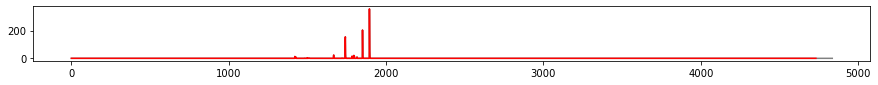

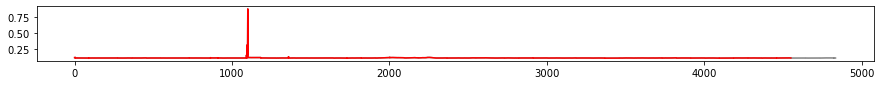

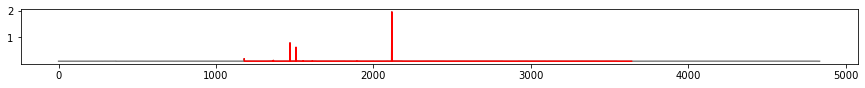

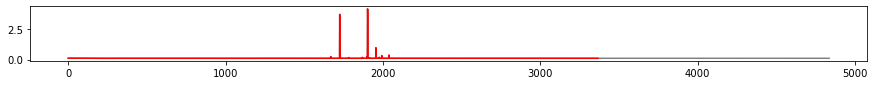

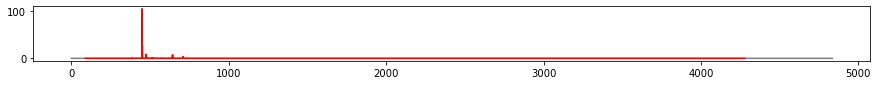

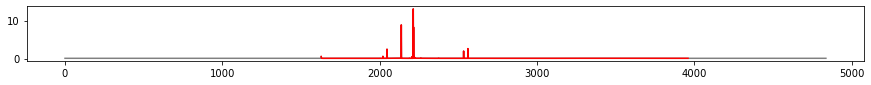

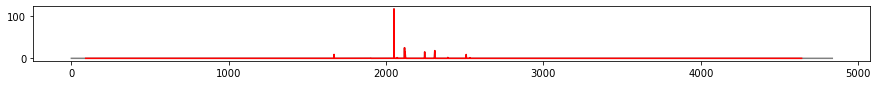

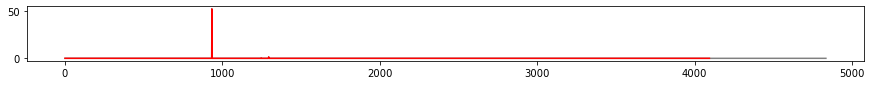

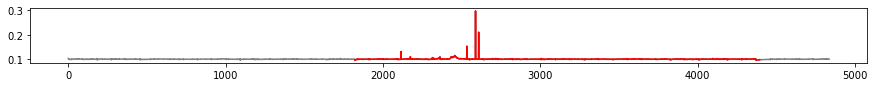

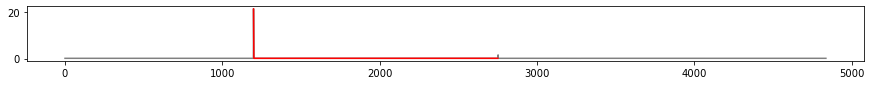

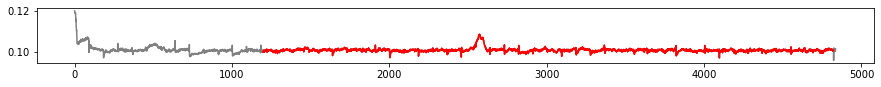

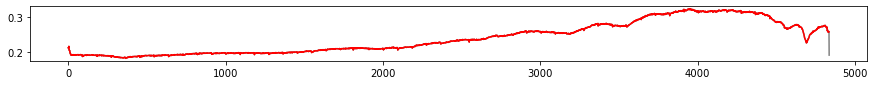

/storage/experiments/2021/0816_bourka_sobeslav


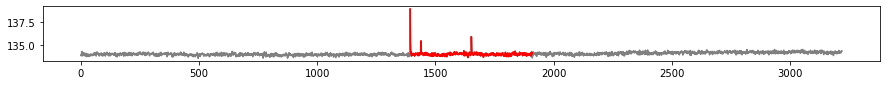

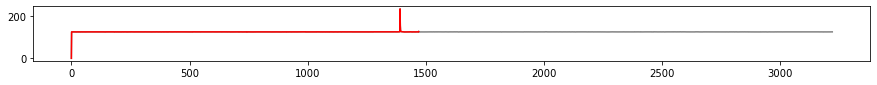

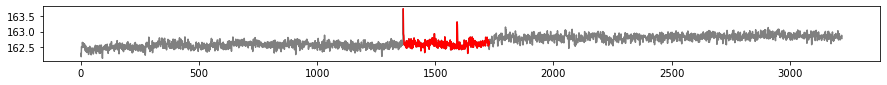

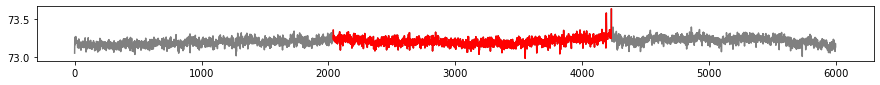

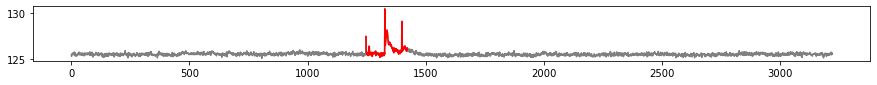

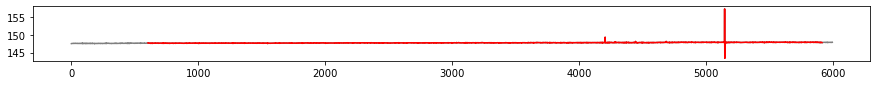

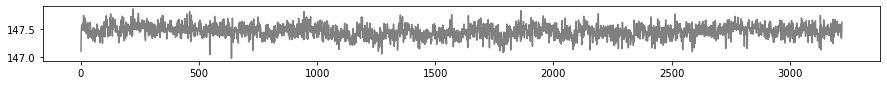

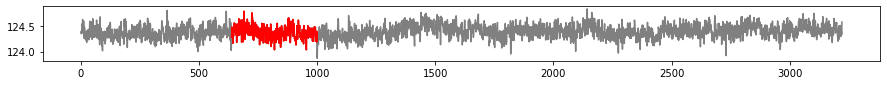

/storage/experiments/2021/0822_bourka_sobeslav_auto0


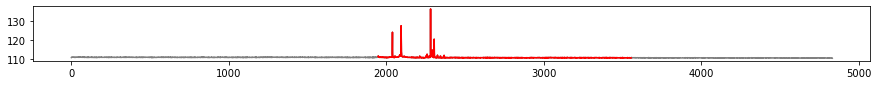

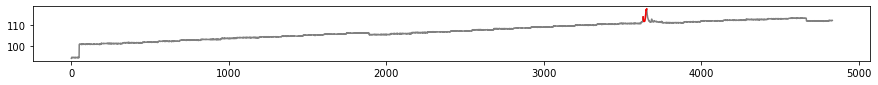

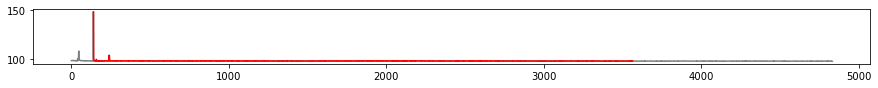

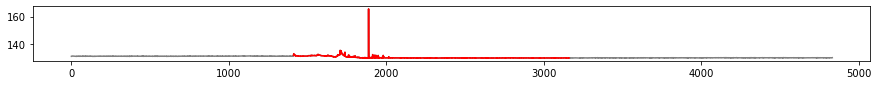

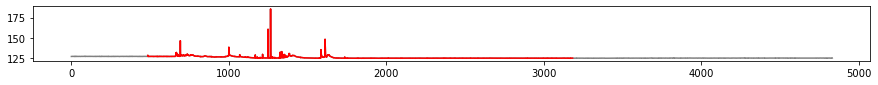

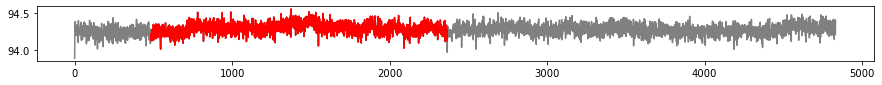

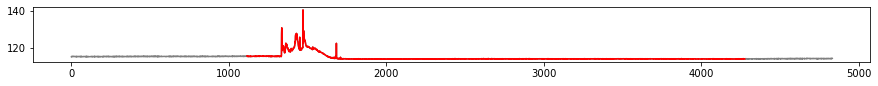

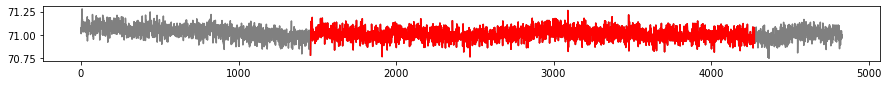

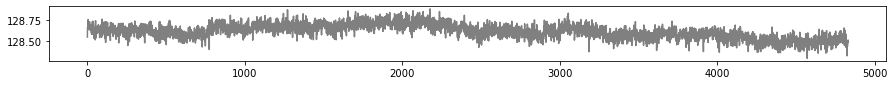

,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9732.0,9495.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9918.0,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11421.0,10061.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,7371.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4125.0,3076.0
...,...,...,...,...,...,...
201,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,2366.0,485.0
202,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,4277.0,1115.0
203,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,4277.0,1457.0
204,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN


In [38]:
'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0713_bourka_exit29_D8",\
"/storage/experiments/2021/0609_bourka_sobeslav"]
'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0609_bourka_sobeslav",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0713_bourka_exit29_D8",\
"/storage/experiments/2021/0714_bourka_martin",\
"/storage/experiments/2021/0714_bourka_sobeslav",\
"/storage/experiments/2021/0725_bourka_ratmirov",\
"/storage/experiments/2021/0726_bourka_zabori",\
"/storage/experiments/2021/0803_bourka_votice",\
"/storage/experiments/2021/0807_bourka_sobeslav",\
"/storage/experiments/2021/0815_bourka_veseli_auto1",\
"/storage/experiments/2021/0815_bourka_veseli_auto0",\
"/storage/experiments/2021/0816_bourka_sobeslav",\
"/storage/experiments/2021/0822_bourka_sobeslav_auto0"]
#'''

files = pd.DataFrame( columns=['name', 'width', 'height', 'frames'])

window_size = 300
threshold = 5

for directory in d:
    print(directory)

    for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        
        # Import light curve
        light_curve = pd.read_csv(f+'.csv', names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        vcap = cv2.VideoCapture(f)
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        video_length = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        signal_samples=light_curve[["illuminance"]].to_numpy()
        if len(signal_samples) > 0:
            start_noise_std = np.std(signal_samples[:window_size])
            start_noise_mean = np.mean(signal_samples[:window_size])
            end_noise_std = np.std(signal_samples[-window_size:])
            end_noise_mean = np.mean(signal_samples[-window_size:])


            for sample_num in range(0,len(signal_samples)):
                z_score = abs(signal_samples[sample_num] - start_noise_mean) / start_noise_std
                if z_score > threshold:
                    event_start = sample_num
                    break

            for sample_num in reversed(range(0,len(signal_samples))):
                z_score = abs(signal_samples[sample_num] - end_noise_mean) / end_noise_std
                if z_score > threshold:
                    event_end = sample_num
                    break
            try:
                plt.figure(figsize=(15,1))
                plt.tight_layout()
                plt.plot(signal_samples,c='gray')
                plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
                plt.show()
            except:
                pass

        else:
            event_start = float("NaN")
            event_end = float("NaN")
        
        #print(f, ',', int(width), ',', int(height), ',', video_length)
        files = files.append({'name':f, 'width':int(width), 'height':int(height), 'frames':video_length, 'event_start':event_start, 'event_end':event_end}, ignore_index=True)
        vcap.release()
files

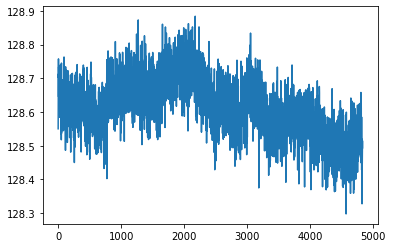

In [3]:
plt.plot(light_curve['frame'],light_curve['illuminance'])

In [80]:
light_curve

,frame,illuminance
0,0,128.550090
1,1,128.662144
2,2,128.653799
3,3,128.712568
4,4,128.702863
...,...,...
4828,4828,128.450104
4829,4829,128.477717
4830,4830,128.483539
4831,4831,128.514541


In [79]:
files

,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,12464.0,3251.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,11131.0,7185.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11424.0,1378.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,7371.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,7914.0,1911.0
...,...,...,...,...,...,...
201,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,4368.0,0.0
202,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,4368.0,1068.0
203,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,4368.0,1402.0
204,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN
